## K Nearest Neighbors with Binary Labels

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
# Importing Data
train_df = pd.read_csv('binary_for_models.csv')
train_df.head()

,Unnamed: 0,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe,functional
1,1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,needs repair
4,4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [4]:
train_df = train_df.drop('Unnamed: 0', axis=1)

In [5]:
train_df.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,6000.0,995,other,1390,other,Lake Nyasa,109,True,VWC,False,1990s,gravity,annually,soft,enough,spring,communal standpipe,functional
1,0.0,272,other,1399,other,Lake Victoria,280,unknown,other,True,2010s,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,281,other,686,other,Pangani,250,True,VWC,True,2000s,gravity,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,0.0,309,unicef,263,other,Ruvuma / Southern Coast,58,True,VWC,True,1980s,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple,needs repair
4,0.0,874,other,0,other,Lake Victoria,0,True,other,True,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [6]:
# Splitting the target column from the rest of the dataframe
target = train_df['status_group']
train_df = train_df.drop('status_group', axis=1)

In [7]:
# One-hot encode the categorical columns
train_df = pd.get_dummies(train_df) 
train_df.head()

,amount_tsh,days_since_recorded,gps_height,population,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,995,1390,109,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.0,272,1399,280,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,25.0,281,686,250,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,309,263,58,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,874,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# Splitting the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.25, random_state=42)

In [9]:
# Normalizing the data using StandardScaler
scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

scaled_df_train = pd.DataFrame(scaled_data_train, columns=train_df.columns)
scaled_df_train.head()

,amount_tsh,days_since_recorded,gps_height,population,funder_danida,funder_gov,funder_hesawa,funder_kkkt,funder_other,funder_rwssp,...,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,-0.093074,1.161086,-0.487869,-0.209732,-0.234547,2.360870,-0.198511,-0.150053,-1.364015,-0.155136,...,-0.630801,-0.630975,-0.034185,-0.044488,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889
1,-0.099150,-0.968986,-0.964042,-0.379567,-0.234547,-0.423573,-0.198511,-0.150053,0.733130,-0.155136,...,1.585285,-0.630975,-0.034185,-0.044488,-0.959431,-0.336484,-0.008206,1.541767,-0.116644,-0.346889
2,-0.099150,0.687737,-0.964042,-0.379567,-0.234547,-0.423573,-0.198511,-0.150053,0.733130,-0.155136,...,-0.630801,-0.630975,-0.034185,-0.044488,-0.959431,-0.336484,-0.008206,1.541767,-0.116644,-0.346889
3,-0.099150,-0.888097,1.260983,-0.330739,-0.234547,2.360870,-0.198511,-0.150053,-1.364015,-0.155136,...,-0.630801,-0.630975,-0.034185,-0.044488,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889
4,-0.099150,-1.565166,-0.209380,-0.377444,-0.234547,-0.423573,-0.198511,-0.150053,-1.364015,-0.155136,...,-0.630801,1.584849,-0.034185,-0.044488,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889


In [10]:
# Fit a KNN model
clf = KNeighborsClassifier()

clf.fit(scaled_data_train, y_train)

test_preds = clf.predict(scaled_data_test)

In [11]:
# Evaluate the model
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

  functional       0.78      0.82      0.80      8098
needs repair       0.78      0.73      0.75      6752

    accuracy                           0.78     14850
   macro avg       0.78      0.78      0.78     14850
weighted avg       0.78      0.78      0.78     14850



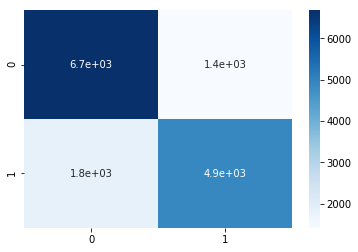

In [12]:
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, cmap='Blues')

In [13]:
# Changing the weights to be distance
clf_2 = KNeighborsClassifier(weights='distance')
clf_2.fit(scaled_data_train, y_train)
test_preds2 = clf_2.predict(scaled_data_test)

In [14]:
print(classification_report(y_test, test_preds2))

              precision    recall  f1-score   support

  functional       0.79      0.83      0.81      8098
needs repair       0.78      0.74      0.76      6752

    accuracy                           0.79     14850
   macro avg       0.79      0.78      0.78     14850
weighted avg       0.79      0.79      0.79     14850



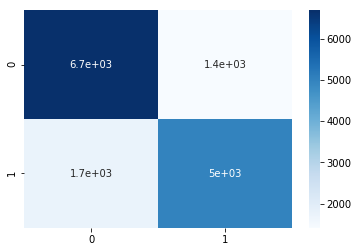

In [15]:
sns.heatmap(confusion_matrix(y_test, test_preds2), annot=True, cmap='Blues')

In [16]:
# Changing the leaf size to 40
clf_3 = KNeighborsClassifier(weights='distance', leaf_size=40)
clf_3.fit(scaled_data_train, y_train)
test_preds3 = clf_3.predict(scaled_data_test)

In [17]:
print(classification_report(y_test, test_preds3))

              precision    recall  f1-score   support

  functional       0.79      0.83      0.81      8098
needs repair       0.78      0.74      0.76      6752

    accuracy                           0.79     14850
   macro avg       0.79      0.78      0.78     14850
weighted avg       0.79      0.79      0.79     14850



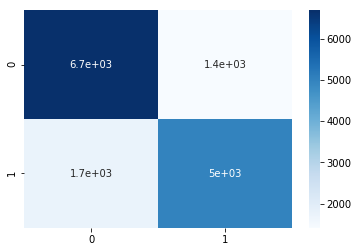

In [18]:
sns.heatmap(confusion_matrix(y_test, test_preds3), annot=True, cmap='Blues')

In [19]:
# Checking all the parameters 
clf_4 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=3, p=2, weights='uniform')
clf_4.fit(scaled_data_train, y_train)
test_preds4 = clf_4.predict(scaled_data_test)

In [20]:
print(classification_report(y_test, test_preds4))

              precision    recall  f1-score   support

  functional       0.79      0.82      0.80      8098
needs repair       0.77      0.74      0.75      6752

    accuracy                           0.78     14850
   macro avg       0.78      0.78      0.78     14850
weighted avg       0.78      0.78      0.78     14850



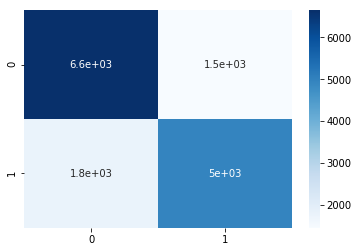

In [21]:
sns.heatmap(confusion_matrix(y_test, test_preds4), annot=True, cmap='Blues')